In [115]:
#installing packages 

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import pandas_datareader
import datetime
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [123]:
start = datetime.datetime(2018, 1, 2)
end = datetime.datetime(2019, 4, 1)

tickers = ['F','FCAU', 'TM',]
stocks = pd.DataFrame()
for x in tickers:
    stocks[x] = web.DataReader(x, 'yahoo', start, end)['Close']

In [124]:
stocks.corr()

,F,FCAU,TM
F,1.000000,0.873512,0.837771
FCAU,0.873512,1.000000,0.852925
TM,0.837771,0.852925,1.000000


In [125]:
# Creating the portfolio weights (3 weights)

portfolio_weights = np.array([0.33, 0.33, 0.34])

In [126]:
#returns 

stocks_return = stocks.pct_change(1).dropna()
stocks_return.tail()

,F,FCAU,TM
Date,,,
2019-03-27,-0.015982,0.018194,-0.006077
2019-03-28,0.017401,-0.020516,-0.016194
2019-03-29,0.001140,0.003378,-0.008818
2019-04-01,0.022779,0.026263,0.015760
2019-04-02,0.003341,0.011811,0.006423


In [127]:
# returns with weights 

weighted_returns_portfolio = stocks_return.mul(portfolio_weights, axis = 1)

weighted_returns_portfolio.head()

,F,FCAU,TM
Date,,,
2018-01-03,0.002607,0.013608,0.004662
2018-01-04,0.005690,0.025107,0.005304
2018-01-05,0.005593,0.017898,0.004373
2018-01-08,-0.001250,-0.002880,0.002311
2018-01-09,-0.001757,0.005964,-0.002649


In [128]:
#returns on portfolio 

stocks_return['Portfolio'] = weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return.tail()

,F,FCAU,TM,Portfolio
Date,,,,
2019-03-27,-0.015982,0.018194,-0.006077,-0.001336
2019-03-28,0.017401,-0.020516,-0.016194,-0.006534
2019-03-29,0.001140,0.003378,-0.008818,-0.001507
2019-04-01,0.022779,0.026263,0.015760,0.021542
2019-04-02,0.003341,0.011811,0.006423,0.007184


In [129]:
start = datetime.datetime(2014, 1, 2)
end = datetime.datetime(2019, 4, 1)

stocks_return['Benchmark'] = web.DataReader('SPY','yahoo',start,end)['Close']

stocks_return['Benchmark'] = stocks_return['Benchmark'].pct_change(1).dropna()

stocks_return.dropna().tail()


,F,FCAU,TM,Portfolio,Benchmark
Date,,,,,
2019-03-27,-0.015982,0.018194,-0.006077,-0.001336,-0.005229
2019-03-28,0.017401,-0.020516,-0.016194,-0.006534,0.003790
2019-03-29,0.001140,0.003378,-0.008818,-0.001507,0.006306
2019-04-01,0.022779,0.026263,0.015760,0.021542,0.011859
2019-04-02,0.003341,0.011811,0.006423,0.007184,0.000490


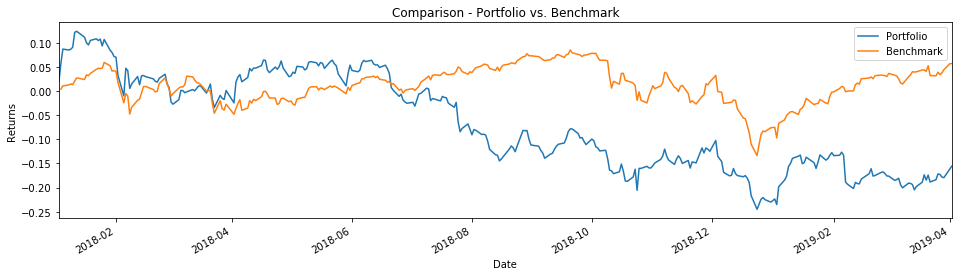

In [130]:
CumulativeReturns = ((1+stocks_return[['Portfolio','Benchmark']]).cumprod()-1)
CumulativeReturns.plot(figsize=(16,4))
_ = plt.ylabel('Returns')

_ = plt.title('Comparison - Portfolio vs. Benchmark')

_ = plt.xlabel('Date')

plt.show()

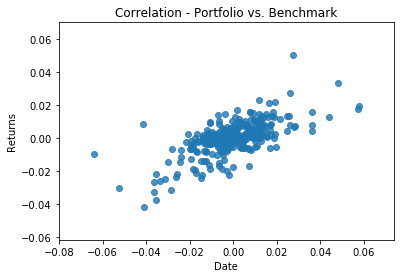

In [133]:
plt.scatter(stocks_return['Portfolio'],stocks_return['Benchmark'],alpha=0.80);

_ = plt.ylabel('Returns')

_ = plt.title('Correlation - Portfolio vs. Benchmark')

_ = plt.xlabel('Date')

In [16]:
stocks_return['RF Rate'] = 0.0103

In [57]:
portfolio_benchmark = pd.concat([stocks_return['Portfolio'],stocks_return['Benchmark']],axis=1).dropna()
portfolio_benchmark.columns = ['Portfolio',' Benchmark']
portfolio_benchmark.tail()

,Portfolio,Benchmark
Date,,
2019-03-27,-0.002729,-0.005229
2019-03-28,-0.001754,0.003790
2019-03-29,-0.000805,0.006306
2019-04-01,0.020648,0.011859
2019-04-02,0.005725,0.000490


In [59]:
correlation = portfolio_benchmark.corr() 
correlation

,Portfolio,Benchmark
Portfolio,1.000000,0.666916
Benchmark,0.666916,1.000000


In [135]:
stocks_return['RF Rate'] = 0.0103
stocks_return.tail()

,F,FCAU,TM,Portfolio,Benchmark,RF Rate
Date,,,,,,
2019-03-27,-0.015982,0.018194,-0.006077,-0.001336,-0.005229,0.0103
2019-03-28,0.017401,-0.020516,-0.016194,-0.006534,0.003790,0.0103
2019-03-29,0.001140,0.003378,-0.008818,-0.001507,0.006306,0.0103
2019-04-01,0.022779,0.026263,0.015760,0.021542,0.011859,0.0103
2019-04-02,0.003341,0.011811,0.006423,0.007184,0.000490,0.0103


In [63]:
stocks_return['excess'] = stocks_return['Portfolio'] - stocks_return['RF Rate']

In [64]:
stocks_return['excess_b'] = stocks_return['Benchmark'] - stocks_return['RF Rate']

stocks_return.tail()

,F,FCAU,TM,Portfolio,Benchmark,RF Rate,excess,excess_b
Date,,,,,,,,
2019-03-27,-0.015982,0.018194,-0.006077,-0.002729,-0.005229,0.0103,-0.013029,-0.015529
2019-03-28,0.017401,-0.020516,-0.016194,-0.001754,0.003790,0.0103,-0.012054,-0.006510
2019-03-29,0.001140,0.003378,-0.008818,-0.000805,0.006306,0.0103,-0.011105,-0.003994
2019-04-01,0.022779,0.026263,0.015760,0.020648,0.011859,0.0103,0.010348,0.001559
2019-04-02,0.003341,0.011811,0.006423,0.005725,0.000490,0.0103,-0.004575,-0.009810


In [65]:
import statsmodels.formula.api as smf 

#elaborting a regression
CAPM_model = smf.ols(formula='excess ~ excess_b', data=stocks_return)




In [66]:
# Fitting the regression

CAPM_fitted = CAPM_model.fit()



In [67]:
# obtaining the beta 

beta = CAPM_fitted.params['excess_b']
beta

0.96691540919715346

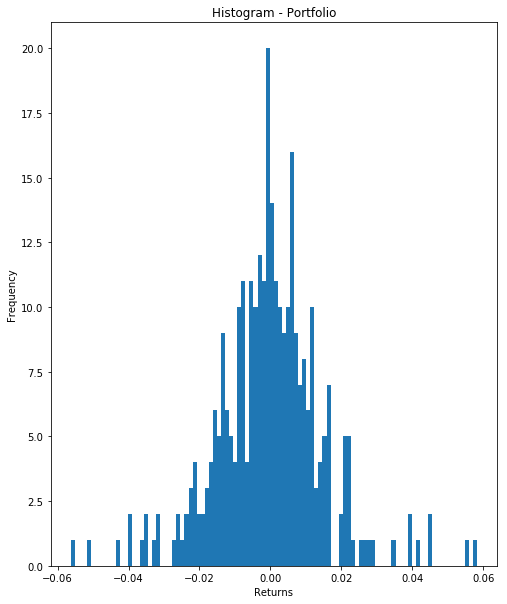

In [103]:
stocks_return['Portfolio'].plot(kind='hist',bins=100,figsize=(8,10));

_ = plt.ylabel('Frequency')

_ = plt.title('Histogram - Portfolio')

_ = plt.xlabel('Returns')

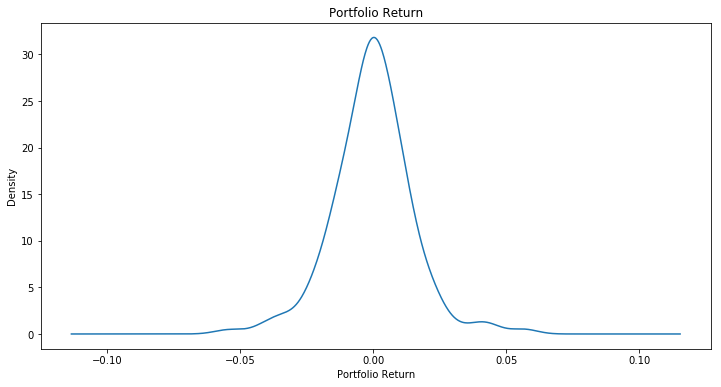

In [76]:
stocks_return['Portfolio'].plot(kind='kde',bw_method='scott', label='IBM',figsize=(12,6));

_ = plt.xlabel('Portfolio Return')

_ = plt.ylabel('Density')

_ = plt.title('Portfolio Return')


In [136]:
sharpe_ratio = ((stocks_return['Portfolio'].mean() - stocks_return['RF Rate'].mean()))/stocks_return['Portfolio'].std()
sharpe_ratio

-0.7134969693218578

In [79]:
import math

annual_days = 252

sharpe_ratio_annual = sharpe_ratio * math.sqrt(annual_days)
sharpe_ratio_annual

-11.18589313516733

In [81]:
(stocks_return['Portfolio'].mean() - 0.0103) * 100

-1.0656648417374064